In [5]:
from tflite_runtime.interpreter import Interpreter 
from PIL import Image
import numpy as np
import time

In [6]:
def load_labels(path): # Read the labels from the text file as a Python list.
  with open(path, 'r') as f:
    return [line.strip() for i, line in enumerate(f.readlines())]

In [7]:
def set_input_tensor(interpreter, image):
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image

In [3]:
def classify_image(interpreter, image, top_k=1):
  set_input_tensor(interpreter, image)

  interpreter.invoke()
  output_details = interpreter.get_output_details()[0]
  output = np.squeeze(interpreter.get_tensor(output_details['index']))

  scale, zero_point = output_details['quantization']
  output = scale * (output - zero_point)

  ordered = np.argpartition(-output, 1)
  return [(i, output[i]) for i in ordered[:top_k]][0]

In [18]:
data_folder = "./"

model_path = data_folder + "mobilenet_v1_1.0_224_quant.tflite"
label_path = data_folder + "labels_mobilenet_quant_v1_224.txt"

interpreter = Interpreter(model_path)
print("Model Loaded Successfully.")

Model Loaded Successfully.


In [19]:
interpreter.allocate_tensors()
_, height, width, _ = interpreter.get_input_details()[0]['shape']
print("Image Shape (", width, ",", height, ")")

Image Shape ( 224 , 224 )


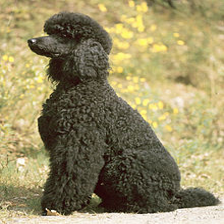

In [20]:
# Load an image to be classified.
image = Image.open(data_folder + "poodle1.jpg").convert('RGB').resize((width, height))
image

In [21]:
# Classify the image.
time1 = time.time()
label_id, prob = classify_image(interpreter, image)
time2 = time.time()
classification_time = np.round(time2-time1, 3)
print("Classification Time =", classification_time, "seconds.")
print("Label_id is", label_id, "Probability is ", prob)

Classification Time = 3.639 seconds.
Label_id is 268 Probability is  0.84765625


In [24]:
# Read class labels.
labels = load_labels(label_path)

# Return the classification label of the image.
classification_label = labels[label_id]
print("Image Label is :", classification_label, ", with Accuracy :", np.round(prob*100, 2), "%.")

Image Label is : standard poodle , with Accuracy : 84.77 %.
